### Steps for CNN of ASL Dataset

Load ASL training and test datasets 
- don't know how to process the image from individual pixels to torch or matplotlib

Define a Convolutional Neural Network
- working on understand different parts of torch architecture steps

Define a loss function

Train the network on the training data

Test the network on the test data

Visualize # of each letter in datasets(Bar graph to show samples in each class)

Randomly generate 1 sample from each class

Show correctly classified and wrongly classified to show why some are easier to classify vs harder to classify

#### Dataset Origin 
https://www.kaggle.com/datamunge/sign-language-mnist

#### Pytorch tutorial/inspiration
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# from tensorflow.keras.datasets import mnist

In [2]:
df_test = pd.read_csv('./sign_mnist_test.csv')
df_train = pd.read_csv('./sign_mnist_train.csv')

In [3]:
#separate labels (letter classes) from training data set
#drop label from rest of pixels
labels_train = df_train['label']
df_train = df_train.drop('label',axis = 1)

In [4]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
# #separate labels (letter classes) from test data set
#drop label from rest of pixels
labels_test = df_test['label']
df_test = df_test.drop('label',axis = 1)

In [6]:
#convert pandas to numpy arrays
np_test =df_test.to_numpy()
np_train = df_train.to_numpy()
labels_train = labels_train.to_numpy()
labels_test = labels_test.to_numpy()

In [7]:
# This loads in the dataset. Thankfully, TensorFlow already has methods to load this dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

#define target values
y_train = labels_train
y_test = labels_test

# Normalize input values
x_train = np_train/255. #0-1
x_test = np_test/255.

# Generate 32x32 image set for use in LeNet
cnn_x_train = x_train.reshape(-1,28,28,1) # don't know what this 1 does
cnn_x_test = x_test.reshape(-1,28,28,1)
# cnn_x_train = np.pad(x_train, ((0,0),(2,2),(2,2))).reshape((-1, 32, 32, 1))
# cnn_x_test = np.pad(x_test, ((0,0),(2,2),(2,2))).reshape((-1, 32, 32, 1))

# Resize images for use in MLP
mlp_x_train = x_train.reshape((x_train.shape[0], 784))
mlp_x_test = x_test.reshape((x_test.shape[0], 784))

In [8]:
mlp_x_train.shape

(27455, 784)

In [9]:
# Implements the network using TensorFlow.Keras
def MLPNetwork(inputDim):
    # input layer (note that batches are already taken care of for you)
    x = keras.Input(shape=(inputDim,))
    
    # subsequent dense layers
    a1 = keras.layers.Dense(512, activation='relu')(x)
    a2 = keras.layers.Dense(512, activation='relu')(a1)
    
    # classification dense layer
    logits = keras.layers.Dense(25, activation='softmax')(a2)
    
    # Creates the model given the above structure
    model = keras.Model(inputs=x, outputs=logits)
    return model

MLPmod = MLPNetwork(784)
MLPmod.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 25)                12825     
Total params: 677,401
Trainable params: 677,401
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Sets up optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)
MLPmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# The callback forces the network to train until it reaches 100% accuracy
hist = MLPmod.fit(mlp_x_train, y_train, epochs=10, shuffle=True)

Train on 27455 samples
Epoch 1/10
27455/27455 [==============================] - 4s 129us/sample - loss: 1.5623 - acc: 0.5060
Epoch 2/10
27455/27455 [==============================] - 3s 100us/sample - loss: 0.5682 - acc: 0.8141
Epoch 3/10
27455/27455 [==============================] - 2s 84us/sample - loss: 0.2673 - acc: 0.9155
Epoch 4/10
27455/27455 [==============================] - 3s 92us/sample - loss: 0.1443 - acc: 0.9543
Epoch 5/10
27455/27455 [==============================] - 3s 104us/sample - loss: 0.1044 - acc: 0.9682
Epoch 6/10
27455/27455 [==============================] - 3s 104us/sample - loss: 0.1161 - acc: 0.9627
Epoch 7/10
27455/27455 [==============================] - 2s 90us/sample - loss: 0.0111 - acc: 0.9981
Epoch 8/10
27455/27455 [==============================] - 3s 97us/sample - loss: 0.1109 - acc: 0.9626
Epoch 9/10
27455/27455 [==============================] - 3s 94us/sample - loss: 0.0523 - acc: 0.9842
Epoch 10/10
27455/27455 [==============================

In [12]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = MLPmod.evaluate(mlp_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 0s 60us/sample - loss: 0.8379 - acc: 0.8345
Test accuracy for this model is 0.8344952464103699


In [131]:
# Creates the model within this function
def LeNet():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    #dropout 1 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    # dropout 2
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  # more on this later
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) #access loss?
    
    return mod

# Declares the model and prepares it for training
LeNetMod = LeNet()
opt = keras.optimizers.Adam()
LeNetMod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) #balanced error rate(FP, recall certain classes)
LeNetMod.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_27 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_28 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 120)               308

In [132]:
from tensorflow.keras.callbacks import History
history = History()
# Trains the network using mini-batch learning
cnnHist = LeNetMod.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 201us/sample - loss: 1.8144 - acc: 0.4429 - val_loss: 0.8868 - val_acc: 0.7150
Epoch 2/20
20591/20591 [==============================] - 3s 142us/sample - loss: 0.5622 - acc: 0.8194 - val_loss: 0.3458 - val_acc: 0.8813
Epoch 3/20
20591/20591 [==============================] - 3s 133us/sample - loss: 0.2228 - acc: 0.9334 - val_loss: 0.1178 - val_acc: 0.9693
Epoch 4/20
20591/20591 [==============================] - 3s 134us/sample - loss: 0.0899 - acc: 0.9761 - val_loss: 0.0812 - val_acc: 0.9799
Epoch 5/20
20591/20591 [==============================] - 3s 142us/sample - loss: 0.0418 - acc: 0.9910 - val_loss: 0.0300 - val_acc: 0.9959
Epoch 6/20
20591/20591 [==============================] - 3s 130us/sample - loss: 0.0334 - acc: 0.9917 - val_loss: 0.0367 - val_acc: 0.9908
Epoch 7/20
20591/20591 [==============================] - 3s 141us/sample - loss: 0.0196 - acc: 0.9958 - val_lo

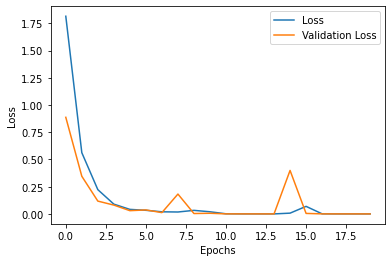

In [133]:
cnnHist.history# training loss
a = cnnHist.history['loss']
b = cnnHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [134]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = LeNetMod.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 83us/sample - loss: 0.6505 - acc: 0.8843
Test accuracy for this model is 0.8842721581459045


Text(0.5, 1.0, 'Number 20 classified as 17')

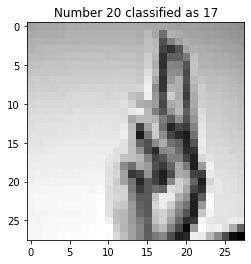

In [30]:
# Plot an incorrect value...
preds = LeNetMod.predict(cnn_x_test)
preds = np.argmax(preds, axis=1)
incorrectPreds = np.argwhere(preds != y_test)
randIncInd = np.random.choice(incorrectPreds.reshape(-1))
plt.imshow(cnn_x_test[randIncInd].reshape(28,28), cmap = 'gray')
plt.title("Number {} classified as {}".format(y_test[randIncInd], preds[randIncInd]))

Text(95.72222222222221, 0.5, 'Actual')

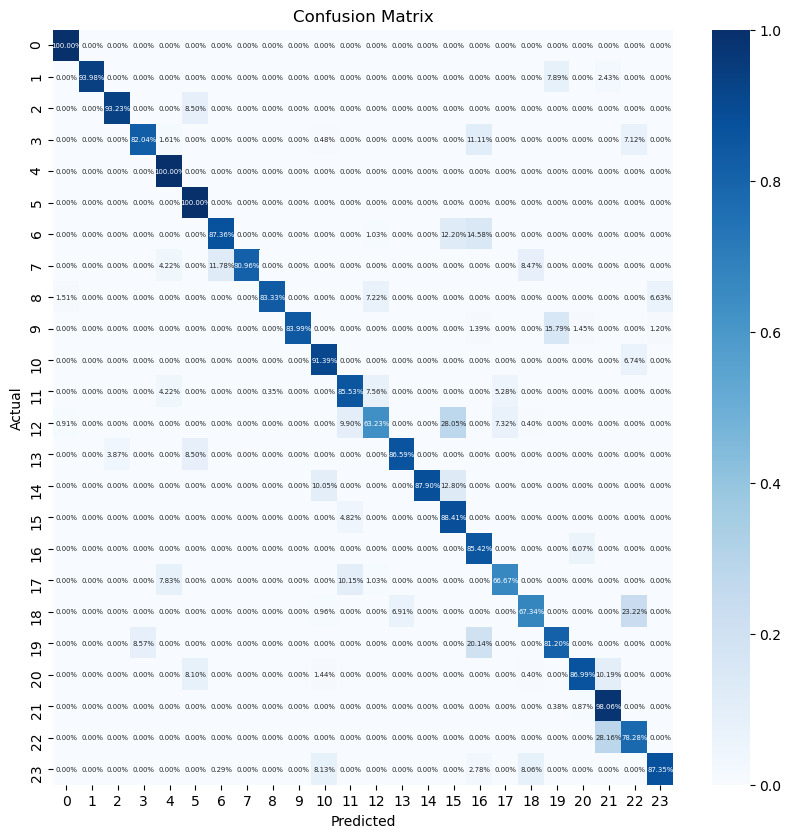

In [31]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

conMat = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,10), dpi=100)
heatmap(conMat/np.sum(conMat,axis=1), annot=True, annot_kws={"size": 5}, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Improvements

- add layers/architecture (available layers in tensorflow) dropout could be helpful
- dropout used in FNN, fully connected to delete certain weights (helps to generalize better)
- add penalty to certain classes e.g 16 is 42% incorrect, give greater weight to certain class
- data augmentation (rotate image, resizing)
- test different optimizer (SGD) and test different loss function (categorical cross entropy)
- .ImageDataGenerator??? rotates pictures?
- hyperparameters to consider: batch size, epochs, learning rate, kernel size, activation functions?

### Code from original notebook to show visualization of class spread and display random images
- include subplots for a few random images?

In [ ]:
#separate labels (letter classes) from training data set
#drop label from rest of pixels
labels_train = df_train['label']
df_train = df_train.drop('label',axis = 1)
# #separate labels (letter classes) from test data set
#drop label from rest of pixels
labels_test = df_test['label']
df_test = df_test.drop('label',axis = 1)

In [ ]:
# create dataframe with all labels to make a bargraph
frames = [labels_train,labels_test]
df_all_labels = pd.concat(frames)
print(df_all_labels.shape)
df_all_labels.head()

In [ ]:
import seaborn as sns
# create a bar graph with number of each labels
'''Want to change so that 0,1,2,3 etc reads A,B,C,D etc'''

ax = sns.barplot(x=df_all_labels.value_counts().index, y=df_all_labels.value_counts())
ax.set(ylabel = '# counts', xlabel = 'Alphabet Letters' )

In [ ]:
# convert pandas df to numpy array and reshape into 28x28 array as prep for picture
''' only relevant for following cell with random image display'''

np_train = df_train.to_numpy() #training dataset
np_train = np_train.reshape(np_train.shape[0],28,28)
np_test = df_test.to_numpy() # testing dataset
np_test = np_test.reshape(np_test.shape[0],28,28)

In [ ]:
#show random image
random_image = random.randint(0,len(np_train))
plt.imshow(np_train[random_image], cmap = 'gray')
plt.title(f"Training Example #{random_image}")
plt.xlabel(labels_train[random_image]) #xlabel = letter of alphabet

## 4/24/21 Improvements
- add layers/architecture (available layers in tensorflow) dropout could be helpful
- dropout used in FNN, fully connected to delete certain weights (helps to generalize better)
- add penalty to certain classes e.g 16 is 42% incorrect, give greater weight to certain class
- data augmentation (rotate image, resizing)
- convert numbers to A-Z for readability

## Implement VGG16 Architecture
- LeNet may be overfitting as training acc is 100% and test acc is 86%

In [136]:
# vgg = tf.keras.applications.vgg16.VGG16(
#     include_top=True, weights= None, input_tensor=None,
#     input_shape=None, pooling=None, classes=1000,
#     classifier_activation='softmax')

In [53]:
#vggmod = keras.applications.vgg16.VGG16(include_top = False, input_shape = (28,28,3))

In [75]:
# opt = keras.optimizers.Adam()
# vggmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# vggmod.summary()

In [76]:
# cnn_vgg_hist = vggmod.fit(cnn_x_train, y_train, validation_split = 0.25, 
#                        batch_size=128, epochs=5, shuffle=True, callbacks = [history])

### Data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=10,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train,Y_train, ... 

early_stopping = EarlyStopping( monitor = 'val-accuracy', min_delta=0.001, # minimium amount of change to count as an improvement
                                patience=10, # how many epochs to wait before stopping
                                restore_best_weights=True
                              )

### Trying VGG 16
- overcomplicating the problem

In [143]:
from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model
# input
# https://towardsdatascience.com/creating-vgg-from-scratch-using-tensorflow-a998a5640155

vgginput = Input(shape =(28,28,1))
# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(vgginput)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# Fully connected layers

x = Flatten()(x)
x = Dense(units = 1024, activation ='relu')(x) #changed num units
x = Dense(units = 1024, activation ='relu')(x) #changed num units
output = Dense(units = 25, activation ='softmax')(x) #changed num units
# creating the model

vggmodel = Model (inputs=vgginput, outputs =output)
opt = keras.optimizers.Adam()
vggmodel.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vggmodel.summary()

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 7, 7, 128)         0  

In [144]:
vggHist = vggmodel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=5, shuffle=True, callbacks = [history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/5
20591/20591 [==============================] - 14s 678us/sample - loss: 3.1856 - acc: 0.0436 - val_loss: 3.1798 - val_acc: 0.0425
Epoch 2/5
20591/20591 [==============================] - 12s 599us/sample - loss: 3.1790 - acc: 0.0453 - val_loss: 3.1786 - val_acc: 0.0468
Epoch 3/5
20591/20591 [==============================] - 12s 595us/sample - loss: 3.1787 - acc: 0.0435 - val_loss: 3.1780 - val_acc: 0.0468
Epoch 4/5
20591/20591 [==============================] - 12s 600us/sample - loss: 3.1781 - acc: 0.0438 - val_loss: 3.1774 - val_acc: 0.0468
Epoch 5/5
20591/20591 [==============================] - 12s 595us/sample - loss: 3.1775 - acc: 0.0448 - val_loss: 3.1773 - val_acc: 0.0468


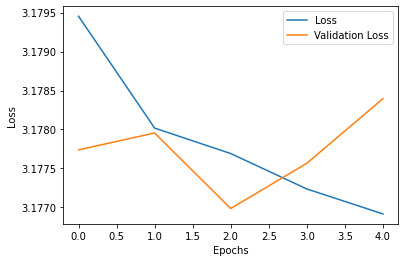

In [69]:
vggHist.history# training loss
a = vggHist.history['loss']
b = vggHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [68]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = vggmodel.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 2s 299us/sample - loss: 3.1947 - acc: 0.0342
Test accuracy for this model is 0.03416062518954277


### Constants in testing
 - kernel size = 5x5
 - learning rate = .0001+
 - optimizer = opt = Adam() opt = keras.optimizers.Adam()
 - relu activation function

In [82]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping( monitor = 'loss', min_delta=0.001, # minimium amount of decreasing loss to count as improvement
                                patience=10, # how many epochs to wait before stopping
                                restore_best_weights=True
                              )

## Testing Structure
- create a new CNN model
- compile model
- fit model to training data
- test model with testing data
- log accuracy, loss
- (maybe) input testing and training loss of each model in a bar graph?


### Test #1 
- add dropout layer after first pooling
- try 10% and 20% and continue on with that

In [74]:
# LeNet model with 10 % dropoout after first pooling
def testModel_1a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod1a = testModel_1a()
testMod1a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod1a.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_5 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_6 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)               0  

In [83]:
testMod1aHist = testMod1a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 159us/sample - loss: 0.0243 - acc: 0.9930 - val_loss: 0.0044 - val_acc: 0.9993
Epoch 2/20
20591/20591 [==============================] - 3s 154us/sample - loss: 0.0112 - acc: 0.9973 - val_loss: 0.0035 - val_acc: 0.9999
Epoch 3/20
20591/20591 [==============================] - 3s 153us/sample - loss: 0.0124 - acc: 0.9966 - val_loss: 0.0046 - val_acc: 0.9990
Epoch 4/20
20591/20591 [==============================] - 3s 133us/sample - loss: 0.0323 - acc: 0.9902 - val_loss: 0.0022 - val_acc: 0.9999
Epoch 5/20
20591/20591 [==============================] - 3s 139us/sample - loss: 0.0041 - acc: 0.9993 - val_loss: 4.1704e-04 - val_acc: 1.0000
Epoch 6/20
20591/20591 [==============================] - 3s 144us/sample - loss: 0.0066 - acc: 0.9982 - val_loss: 0.0041 - val_acc: 0.9999
Epoch 7/20
20591/20591 [==============================] - 3s 154us/sample - loss: 0.0096 - acc: 0.9974 - va

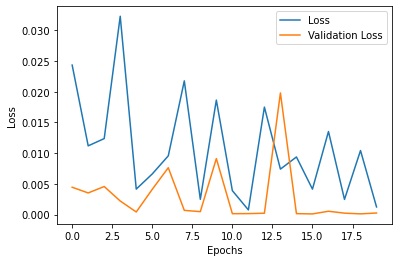

In [84]:
# testMod1aHist.history# training loss
a = testMod1aHist.history['loss']
b = testMod1aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [97]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod1a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 86us/sample - loss: 0.3988 - acc: 0.9307
Test accuracy for this model is 0.9307027459144592


In [98]:
# LeNet model with 20 % dropoout after first pooling
def testModel_1b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod1b = testModel_1b()
testMod1b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod1b.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_12 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)               0  

In [99]:
testMod1bHist = testMod1b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 180us/sample - loss: 1.4218 - acc: 0.5455 - val_loss: 0.5257 - val_acc: 0.8441
Epoch 2/20
20591/20591 [==============================] - 3s 141us/sample - loss: 0.4454 - acc: 0.8480 - val_loss: 0.2107 - val_acc: 0.9384
Epoch 3/20
20591/20591 [==============================] - 3s 140us/sample - loss: 0.2349 - acc: 0.9200 - val_loss: 0.1084 - val_acc: 0.9760
Epoch 4/20
20591/20591 [==============================] - 3s 146us/sample - loss: 0.1484 - acc: 0.9517 - val_loss: 0.0579 - val_acc: 0.9879
Epoch 5/20
20591/20591 [==============================] - 3s 123us/sample - loss: 0.0941 - acc: 0.9726 - val_loss: 0.0303 - val_acc: 0.9953
Epoch 6/20
20591/20591 [==============================] - 3s 129us/sample - loss: 0.0705 - acc: 0.9794 - val_loss: 0.0190 - val_acc: 0.9980
Epoch 7/20
20591/20591 [==============================] - 3s 155us/sample - loss: 0.0542 - acc: 0.9832 - val_lo

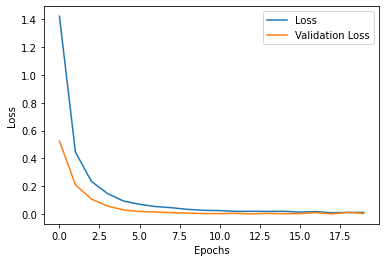

In [100]:
# testMod2aHist.history# training loss
a = testMod1bHist.history['loss']
b = testMod1bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [101]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod1b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 97us/sample - loss: 0.4644 - acc: 0.8961
Test accuracy for this model is 0.8961238265037537


### Test #2
- add dropout layer after second pooling
- try 10% and 20% and continue on with that

In [102]:
# LeNet model with 10 % dropoout after second pooling
def testModel_2a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod2a = testModel_2a()
testMod2a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod2a.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_14 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 256)               0  

In [103]:
testMod2aHist = testMod2a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 174us/sample - loss: 1.3855 - acc: 0.5569 - val_loss: 0.5450 - val_acc: 0.8399
Epoch 2/20
20591/20591 [==============================] - 3s 138us/sample - loss: 0.4453 - acc: 0.8495 - val_loss: 0.2549 - val_acc: 0.9165
Epoch 3/20
20591/20591 [==============================] - 3s 138us/sample - loss: 0.2327 - acc: 0.9227 - val_loss: 0.1172 - val_acc: 0.9677
Epoch 4/20
20591/20591 [==============================] - 3s 139us/sample - loss: 0.1447 - acc: 0.9525 - val_loss: 0.0687 - val_acc: 0.9844
Epoch 5/20
20591/20591 [==============================] - 3s 133us/sample - loss: 0.1045 - acc: 0.9660 - val_loss: 0.0358 - val_acc: 0.9902
Epoch 6/20
20591/20591 [==============================] - 3s 143us/sample - loss: 0.0879 - acc: 0.9730 - val_loss: 0.0334 - val_acc: 0.9939
Epoch 7/20
20591/20591 [==============================] - 3s 157us/sample - loss: 0.0611 - acc: 0.9808 - val_lo

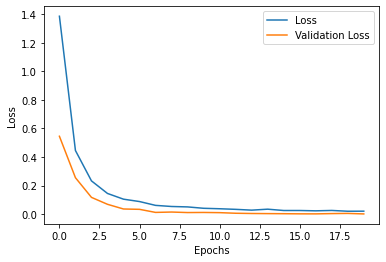

In [104]:
# testMod2aHist.history# training loss
a = testMod2aHist.history['loss']
b = testMod2aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [105]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod2a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 99us/sample - loss: 0.6794 - acc: 0.8816
Test accuracy for this model is 0.8816229701042175


In [106]:
# LeNet model with 10 % dropoout after second pooling
def testModel_2b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod2b = testModel_2b()
testMod2b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod2b.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_15 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_16 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 256)               0  

In [107]:
testMod2bHist = testMod2b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 177us/sample - loss: 1.3719 - acc: 0.5560 - val_loss: 0.5674 - val_acc: 0.8167
Epoch 2/20
20591/20591 [==============================] - 3s 136us/sample - loss: 0.5447 - acc: 0.8147 - val_loss: 0.2526 - val_acc: 0.9216
Epoch 3/20
20591/20591 [==============================] - 2s 118us/sample - loss: 0.3199 - acc: 0.8928 - val_loss: 0.1203 - val_acc: 0.9712
Epoch 4/20
20591/20591 [==============================] - 3s 132us/sample - loss: 0.2119 - acc: 0.9296 - val_loss: 0.0731 - val_acc: 0.9856
Epoch 5/20
20591/20591 [==============================] - 3s 140us/sample - loss: 0.1583 - acc: 0.9483 - val_loss: 0.0552 - val_acc: 0.9886
Epoch 6/20
20591/20591 [==============================] - 3s 141us/sample - loss: 0.1267 - acc: 0.9587 - val_loss: 0.0423 - val_acc: 0.9876
Epoch 7/20
20591/20591 [==============================] - 3s 143us/sample - loss: 0.0993 - acc: 0.9682 - val_lo

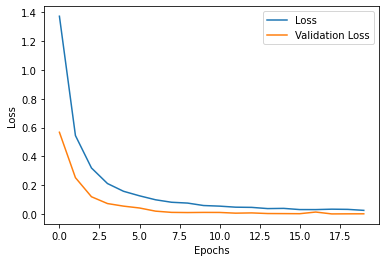

In [108]:
# testMod2aHist.history# training loss
a = testMod2bHist.history['loss']
b = testMod2bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [109]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod2b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 103us/sample - loss: 0.2773 - acc: 0.9395
Test accuracy for this model is 0.9394869208335876


### Test #3
- add both dropout layers together

In [110]:
# LeNet model with 10 % dropoout after second pooling
def testModel_3():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod3 = testModel_3()
testMod3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod3.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_17 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_18 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 16)          0  

In [111]:
testMod3Hist = testMod3.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 227us/sample - loss: 1.8268 - acc: 0.4222 - val_loss: 0.7234 - val_acc: 0.7679
Epoch 2/20
20591/20591 [==============================] - 3s 150us/sample - loss: 0.6587 - acc: 0.7743 - val_loss: 0.3124 - val_acc: 0.9054
Epoch 3/20
20591/20591 [==============================] - 3s 146us/sample - loss: 0.3705 - acc: 0.8736 - val_loss: 0.1343 - val_acc: 0.9732
Epoch 4/20
20591/20591 [==============================] - 3s 151us/sample - loss: 0.2428 - acc: 0.9198 - val_loss: 0.0687 - val_acc: 0.9889
Epoch 5/20
20591/20591 [==============================] - 3s 160us/sample - loss: 0.1735 - acc: 0.9437 - val_loss: 0.0500 - val_acc: 0.9917
Epoch 6/20
20591/20591 [==============================] - 3s 164us/sample - loss: 0.1356 - acc: 0.9568 - val_loss: 0.0348 - val_acc: 0.9940
Epoch 7/20
20591/20591 [==============================] - 3s 152us/sample - loss: 0.1089 - acc: 0.9655 - val_lo

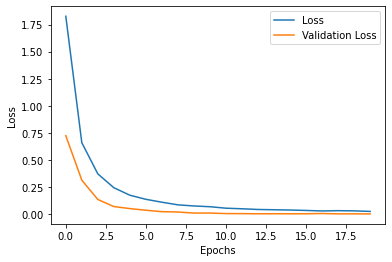

In [112]:
# testMod2aHist.history# training loss
a = testMod3Hist.history['loss']
b = testMod3Hist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [113]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod3.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 106us/sample - loss: 0.2908 - acc: 0.9260
Test accuracy for this model is 0.9259620904922485


### Best performance so far is with 2b - 20% dropout after second convolution and pooling
### now test adding and 

### Test #4
- remove dense layer 1 and 2 
- combine best w/ 2b

In [114]:
# LeNet model with one less dense layer
def testModel_4a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
#   out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4a = testModel_4a()
testMod4a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4a.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_19 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_20 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 84)                215

In [115]:
testMod4aHist = testMod4a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 181us/sample - loss: 1.4598 - acc: 0.5438 - val_loss: 0.8447 - val_acc: 0.7315
Epoch 2/20
20591/20591 [==============================] - 3s 126us/sample - loss: 0.6313 - acc: 0.7971 - val_loss: 0.4526 - val_acc: 0.8488
Epoch 3/20
20591/20591 [==============================] - 2s 118us/sample - loss: 0.3544 - acc: 0.8864 - val_loss: 0.2486 - val_acc: 0.9273
Epoch 4/20
20591/20591 [==============================] - 3s 135us/sample - loss: 0.2083 - acc: 0.9399 - val_loss: 0.1392 - val_acc: 0.9652
Epoch 5/20
20591/20591 [==============================] - 3s 140us/sample - loss: 0.1181 - acc: 0.9712 - val_loss: 0.0905 - val_acc: 0.9771
Epoch 6/20
20591/20591 [==============================] - 3s 136us/sample - loss: 0.0739 - acc: 0.9846 - val_loss: 0.0460 - val_acc: 0.9929
Epoch 7/20
20591/20591 [==============================] - 3s 144us/sample - loss: 0.0438 - acc: 0.9931 - val_lo

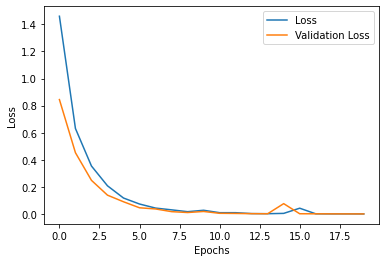

In [116]:
# testMod2aHist.history# training loss
a = testMod4aHist.history['loss']
b = testMod4aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [117]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 88us/sample - loss: 0.9792 - acc: 0.8448
Test accuracy for this model is 0.8448131680488586


In [118]:
# LeNet model with one less dense layer
def testModel_4b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
#   out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4b = testModel_4b()
testMod4b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4b.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_21 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_22 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 120)               308

In [119]:
testMod4bHist = testMod4b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 188us/sample - loss: 1.2620 - acc: 0.6013 - val_loss: 0.5018 - val_acc: 0.8389
Epoch 2/20
20591/20591 [==============================] - 3s 149us/sample - loss: 0.3168 - acc: 0.9038 - val_loss: 0.1603 - val_acc: 0.9578
Epoch 3/20
20591/20591 [==============================] - 2s 110us/sample - loss: 0.1175 - acc: 0.9707 - val_loss: 0.0573 - val_acc: 0.9927
Epoch 4/20
20591/20591 [==============================] - 3s 129us/sample - loss: 0.0499 - acc: 0.9924 - val_loss: 0.0412 - val_acc: 0.9929
Epoch 5/20
20591/20591 [==============================] - 3s 139us/sample - loss: 0.0272 - acc: 0.9966 - val_loss: 0.0157 - val_acc: 0.9991
Epoch 6/20
20591/20591 [==============================] - 3s 142us/sample - loss: 0.0122 - acc: 0.9993 - val_loss: 0.0081 - val_acc: 0.9996
Epoch 7/20
20591/20591 [==============================] - 2s 117us/sample - loss: 0.0092 - acc: 0.9993 - val_lo

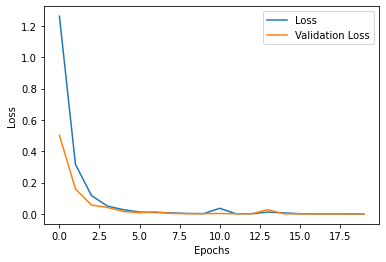

In [120]:
# testMod2aHist.history# training loss
a = testMod4bHist.history['loss']
b = testMod4bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [121]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 99us/sample - loss: 0.7827 - acc: 0.8516
Test accuracy for this model is 0.851645290851593


In [122]:
# LeNet model with one less dense layer and 20% dropout after second pooling
def testModel_4c():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
#   out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4c = testModel_4c()
testMod4c.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4c.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_23 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_24 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 256)               0  

In [123]:
testMod4cHist = testMod4c.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 195us/sample - loss: 1.4005 - acc: 0.5598 - val_loss: 0.5132 - val_acc: 0.8593
Epoch 2/20
20591/20591 [==============================] - 3s 145us/sample - loss: 0.5216 - acc: 0.8275 - val_loss: 0.2389 - val_acc: 0.9387
Epoch 3/20
20591/20591 [==============================] - 3s 142us/sample - loss: 0.3289 - acc: 0.8907 - val_loss: 0.1328 - val_acc: 0.9674
Epoch 4/20
20591/20591 [==============================] - 3s 135us/sample - loss: 0.2347 - acc: 0.9222 - val_loss: 0.0838 - val_acc: 0.9847
Epoch 5/20
20591/20591 [==============================] - 3s 127us/sample - loss: 0.1779 - acc: 0.9398 - val_loss: 0.0467 - val_acc: 0.9936
Epoch 6/20
20591/20591 [==============================] - 2s 120us/sample - loss: 0.1480 - acc: 0.9514 - val_loss: 0.0378 - val_acc: 0.9983
Epoch 7/20
20591/20591 [==============================] - 2s 114us/sample - loss: 0.1222 - acc: 0.9596 - val_lo

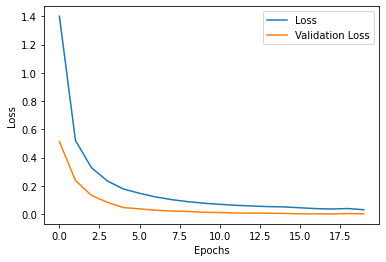

In [124]:
# testMod2aHist.history# training loss
a = testMod4cHist.history['loss']
b = testMod4cHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [125]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4c.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 98us/sample - loss: 0.3989 - acc: 0.8940
Test accuracy for this model is 0.89403235912323


## combination of dropped dense layer and dropout not as good as dropout alone

### Test #5
- add extra convolution layer before pooling
- combine it with dropout
- combine with dropout and dense layer missing

In [126]:
# LeNet model with additional convolution layer
def testModel_5a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod5a = testModel_5a()
testMod5a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod5a.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_25 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_26 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 128)               0  

In [127]:
testMod5aHist = testMod5a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 226us/sample - loss: 1.8507 - acc: 0.3953 - val_loss: 1.0088 - val_acc: 0.6640
Epoch 2/20
20591/20591 [==============================] - 3s 142us/sample - loss: 0.7074 - acc: 0.7597 - val_loss: 0.4555 - val_acc: 0.8478
Epoch 3/20
20591/20591 [==============================] - 3s 145us/sample - loss: 0.3492 - acc: 0.8815 - val_loss: 0.2443 - val_acc: 0.9213
Epoch 4/20
20591/20591 [==============================] - 3s 159us/sample - loss: 0.1723 - acc: 0.9449 - val_loss: 0.1402 - val_acc: 0.9535
Epoch 5/20
20591/20591 [==============================] - 3s 136us/sample - loss: 0.0999 - acc: 0.9707 - val_loss: 0.1462 - val_acc: 0.9471
Epoch 6/20
20591/20591 [==============================] - 3s 153us/sample - loss: 0.0616 - acc: 0.9825 - val_loss: 0.0473 - val_acc: 0.9875
Epoch 7/20
20591/20591 [==============================] - 3s 152us/sample - loss: 0.0414 - acc: 0.9887 - val_lo

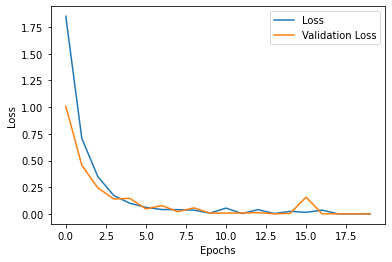

In [128]:
# testMod2aHist.history# training loss
a = testMod5aHist.history['loss']
b = testMod5aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [129]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod5a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 111us/sample - loss: 1.0199 - acc: 0.8429
Test accuracy for this model is 0.8428611159324646


In [138]:
#5b combine convolutional layer with 20 %dropout
# LeNet model with additional convolution layer
def testModel_5b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod5b = testModel_5b()
testMod5b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod5b.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_29 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_30 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2, 2, 32)          0  

In [139]:
testMod5bHist = testMod5b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 231us/sample - loss: 1.7266 - acc: 0.4386 - val_loss: 0.7806 - val_acc: 0.7554
Epoch 2/20
20591/20591 [==============================] - 3s 159us/sample - loss: 0.8180 - acc: 0.7165 - val_loss: 0.4406 - val_acc: 0.8705
Epoch 3/20
20591/20591 [==============================] - 3s 161us/sample - loss: 0.5732 - acc: 0.8003 - val_loss: 0.2896 - val_acc: 0.9097
Epoch 4/20
20591/20591 [==============================] - 3s 157us/sample - loss: 0.4376 - acc: 0.8454 - val_loss: 0.1691 - val_acc: 0.9557
Epoch 5/20
20591/20591 [==============================] - 3s 154us/sample - loss: 0.3464 - acc: 0.8812 - val_loss: 0.1177 - val_acc: 0.9679
Epoch 6/20
20591/20591 [==============================] - 3s 149us/sample - loss: 0.2918 - acc: 0.8979 - val_loss: 0.0783 - val_acc: 0.9847
Epoch 7/20
20591/20591 [==============================] - 3s 147us/sample - loss: 0.2438 - acc: 0.9154 - val_lo

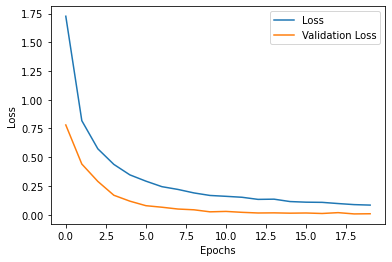

In [140]:
# testMod2aHist.history# training loss
a = testMod5bHist.history['loss']
b = testMod5bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [141]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod5b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 92us/sample - loss: 0.4010 - acc: 0.8979
Test accuracy for this model is 0.8979364037513733


### Test #6
- add image augmentation
- different levels of rotation/scaling?

In [146]:
# use keras preprocessing to apply random image manipulations and increase model especially as it relates to location
# and rotation invariance
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
augmentedData = ImageDataGenerator(rotation_range= 30, # randomly rotate images in the range 15 degrees 
                                   zoom_range = 0.1, # Randomly zoom image 10% 
                                   width_shift_range=0.1, # randomly shift images horizontally 10%
                                   height_shift_range=0.1, # randomly shift images vertically 10% 
                                   shear_range = 10)
augmentedData.fit(cnn_x_train)
train_generator = augmentedData.flow(cnn_x_train,y_train, batch_size = 50)



In [152]:
#Original LeNet model w/ data augmentation
def testModel_6a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod6a = testModel_6a()
testMod6a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod6a.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_33 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_34 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 120)               308

In [153]:
testMod6aHist = testMod6a.fit(train_generator, validation_data = (cnn_x_test,y_test), 
                              epochs=20, shuffle=True, callbacks = [early_stopping, history])

Epoch 1/20
550/550 [==============================] - 14s 26ms/step - loss: 2.3257 - acc: 0.2689 - val_loss: 1.4063 - val_acc: 0.5566
Epoch 2/20
550/550 [==============================] - 11s 19ms/step - loss: 1.5252 - acc: 0.4954 - val_loss: 0.9734 - val_acc: 0.6829
Epoch 3/20
550/550 [==============================] - 11s 20ms/step - loss: 1.2346 - acc: 0.5850 - val_loss: 0.8189 - val_acc: 0.7352
Epoch 4/20
550/550 [==============================] - 10s 19ms/step - loss: 1.0480 - acc: 0.6470 - val_loss: 0.7569 - val_acc: 0.7552
Epoch 5/20
550/550 [==============================] - 11s 19ms/step - loss: 0.9278 - acc: 0.6864 - val_loss: 0.6315 - val_acc: 0.7833
Epoch 6/20
550/550 [==============================] - 11s 19ms/step - loss: 0.8480 - acc: 0.7138 - val_loss: 0.5417 - val_acc: 0.8190
Epoch 7/20
550/550 [==============================] - 11s 21ms/step - loss: 0.7601 - acc: 0.7452 - val_loss: 0.5450 - val_acc: 0.8226
Epoch 8/20
550/550 [==============================] - 12s 22ms

550/550 [==============================] - 10s 19ms/step - loss: 0.4789 - acc: 0.8412 - val_loss: 0.2529 - val_acc: 0.9215
Epoch 14/20
550/550 [==============================] - 10s 19ms/step - loss: 0.4407 - acc: 0.8526 - val_loss: 0.2665 - val_acc: 0.8996
Epoch 15/20
550/550 [==============================] - 12s 21ms/step - loss: 0.4232 - acc: 0.8585 - val_loss: 0.2636 - val_acc: 0.9205
Epoch 16/20
550/550 [==============================] - 11s 20ms/step - loss: 0.3930 - acc: 0.8667 - val_loss: 0.2464 - val_acc: 0.9106
Epoch 17/20
550/550 [==============================] - 11s 21ms/step - loss: 0.3795 - acc: 0.8724 - val_loss: 0.1784 - val_acc: 0.9484
Epoch 18/20
550/550 [==============================] - 11s 20ms/step - loss: 0.3605 - acc: 0.8787 - val_loss: 0.1958 - val_acc: 0.9303
Epoch 19/20
550/550 [==============================] - 11s 20ms/step - loss: 0.3391 - acc: 0.8876 - val_loss: 0.2096 - val_acc: 0.9345
Epoch 20/20
550/550 [==============================] - 11s 21ms/ste

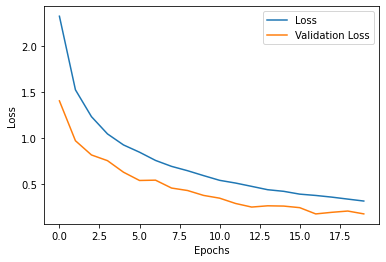

In [154]:
# testMod2aHist.history# training loss
a = testMod6aHist.history['loss']
b = testMod6aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [155]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod6a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 112us/sample - loss: 0.1791 - acc: 0.9407
Test accuracy for this model is 0.940741777420044


In [156]:
#Original LeNet model w/ data augmentation and dropout layer
def testModel_6b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod6b = testModel_6b()
testMod6b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod6b.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_35 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_36 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 256)               0  

In [157]:
testMod6bHist = testMod6b.fit(train_generator, validation_data = (cnn_x_test,y_test), 
                              epochs=20, shuffle=True, callbacks = [early_stopping, history])

Epoch 1/20
550/550 [==============================] - 14s 25ms/step - loss: 2.3624 - acc: 0.2593 - val_loss: 1.4666 - val_acc: 0.5226
Epoch 2/20
550/550 [==============================] - 11s 20ms/step - loss: 1.7059 - acc: 0.4425 - val_loss: 1.0452 - val_acc: 0.6810
Epoch 3/20
550/550 [==============================] - 12s 22ms/step - loss: 1.4687 - acc: 0.5192 - val_loss: 0.9131 - val_acc: 0.7146
Epoch 4/20
550/550 [==============================] - 12s 22ms/step - loss: 1.3258 - acc: 0.5612 - val_loss: 0.7575 - val_acc: 0.7729
Epoch 5/20
550/550 [==============================] - 12s 21ms/step - loss: 1.2156 - acc: 0.5947 - val_loss: 0.7281 - val_acc: 0.7709
Epoch 6/20
550/550 [==============================] - 11s 21ms/step - loss: 1.1318 - acc: 0.6248 - val_loss: 0.5561 - val_acc: 0.8277
Epoch 7/20
550/550 [==============================] - 11s 21ms/step - loss: 1.0473 - acc: 0.6495 - val_loss: 0.6140 - val_acc: 0.7835
Epoch 8/20
550/550 [==============================] - 11s 21ms

550/550 [==============================] - 13s 23ms/step - loss: 0.7755 - acc: 0.7358 - val_loss: 0.3501 - val_acc: 0.8866
Epoch 14/20
550/550 [==============================] - 13s 23ms/step - loss: 0.7351 - acc: 0.7526 - val_loss: 0.3166 - val_acc: 0.8914
Epoch 15/20
550/550 [==============================] - 13s 24ms/step - loss: 0.7072 - acc: 0.7589 - val_loss: 0.2989 - val_acc: 0.9081
Epoch 16/20
550/550 [==============================] - 13s 24ms/step - loss: 0.6667 - acc: 0.7713 - val_loss: 0.3030 - val_acc: 0.9024
Epoch 17/20
550/550 [==============================] - 14s 25ms/step - loss: 0.6569 - acc: 0.7768 - val_loss: 0.3076 - val_acc: 0.9085
Epoch 18/20
550/550 [==============================] - 14s 25ms/step - loss: 0.6372 - acc: 0.7846 - val_loss: 0.2506 - val_acc: 0.9294
Epoch 19/20
550/550 [==============================] - 14s 25ms/step - loss: 0.5920 - acc: 0.7970 - val_loss: 0.2423 - val_acc: 0.9281
Epoch 20/20
550/550 [==============================] - 14s 25ms/ste

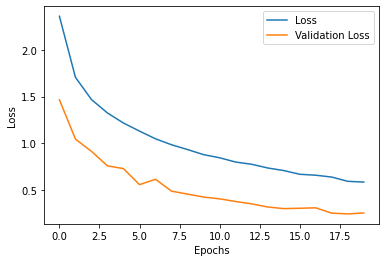

In [158]:
# testMod2aHist.history# training loss
a = testMod6bHist.history['loss']
b = testMod6bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [159]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod6b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 116us/sample - loss: 0.2528 - acc: 0.9311
Test accuracy for this model is 0.9311210513114929


### image augmentation alone performed better than with the dropout layer ~1%

- loss in image augmentation is very high compared to dropout

### Test #7
- test hyper parameters
- kernel size, learning rate, dropout rate, batch size, epochs
- test SGD vs Adam

In [160]:
#7a
# LeNet model with 10x learning
def testModel_7a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7a = testModel_7a()
opt = keras.optimizers.Adam(learning_rate=0.01) #10x learning rate 0.001 -> 0.01
testMod7a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7a.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_37 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_38 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 128)               0  

In [161]:
testMod7aHist = testMod7a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 237us/sample - loss: 2.3035 - acc: 0.2761 - val_loss: 0.9850 - val_acc: 0.6608
Epoch 2/20
20591/20591 [==============================] - 3s 157us/sample - loss: 0.6734 - acc: 0.7608 - val_loss: 0.5150 - val_acc: 0.8220
Epoch 3/20
20591/20591 [==============================] - 3s 149us/sample - loss: 0.3267 - acc: 0.8836 - val_loss: 0.1862 - val_acc: 0.9318
Epoch 4/20
20591/20591 [==============================] - 3s 151us/sample - loss: 0.2136 - acc: 0.9292 - val_loss: 0.1929 - val_acc: 0.9318
Epoch 5/20
20591/20591 [==============================] - 3s 162us/sample - loss: 0.1614 - acc: 0.9492 - val_loss: 0.1564 - val_acc: 0.9493
Epoch 6/20
20591/20591 [==============================] - 3s 151us/sample - loss: 0.1533 - acc: 0.9508 - val_loss: 0.1273 - val_acc: 0.9623
Epoch 7/20
20591/20591 [==============================] - 3s 140us/sample - loss: 0.1122 - acc: 0.9648 - val_lo

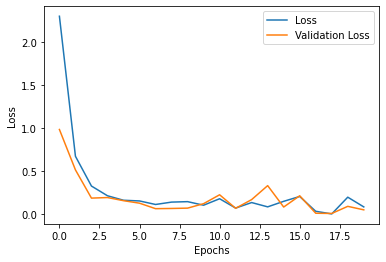

In [162]:
# testMod2aHist.history# training loss
a = testMod7aHist.history['loss']
b = testMod7aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [163]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod7a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 105us/sample - loss: 4.2290 - acc: 0.6965
Test accuracy for this model is 0.6964584589004517


In [ ]:
# automating hyperparameter testing

batch_size_lst = linspace(50,150,15)
dropout rate linspace(10,30,5)

